Data written to size_independent_data_anajl.csv
Data written to size_dependent_data_anajl.csv
Data written to moments_data_size_dep_aggreg_anajl.csv


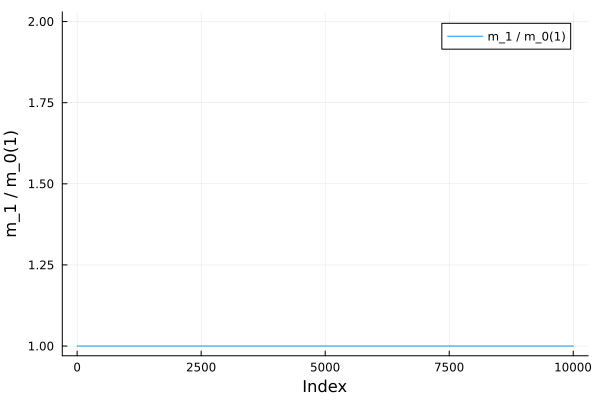

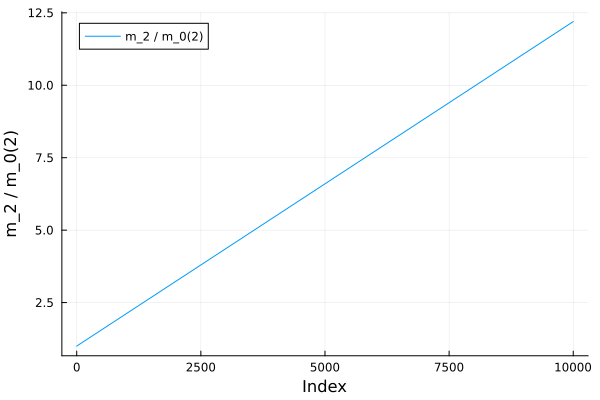

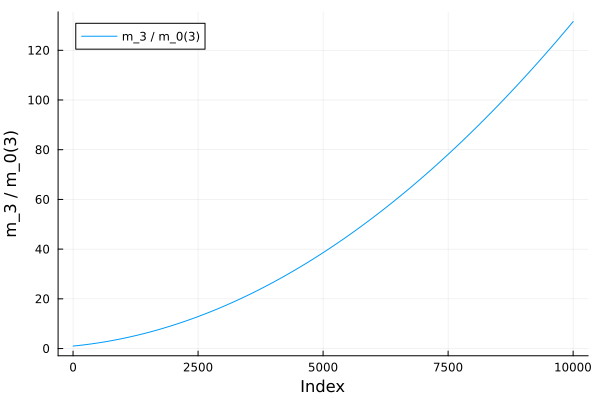

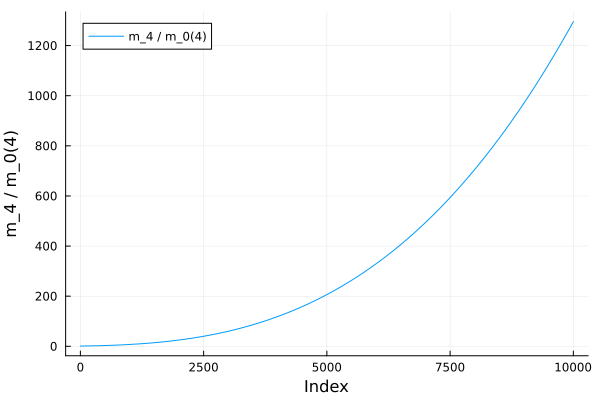

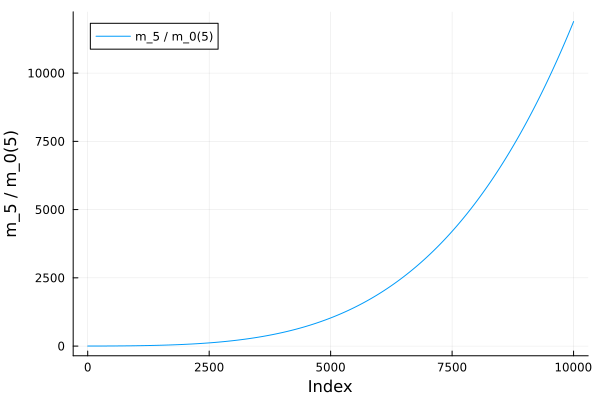

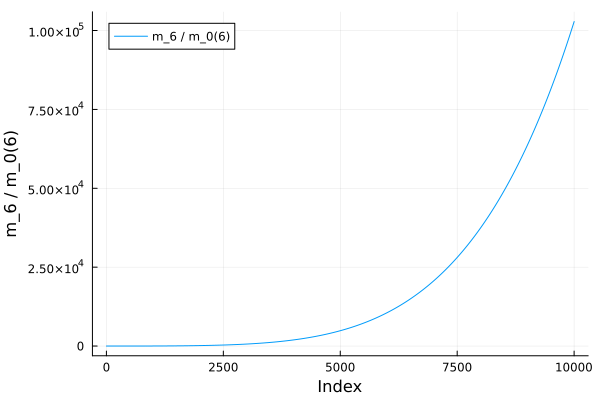

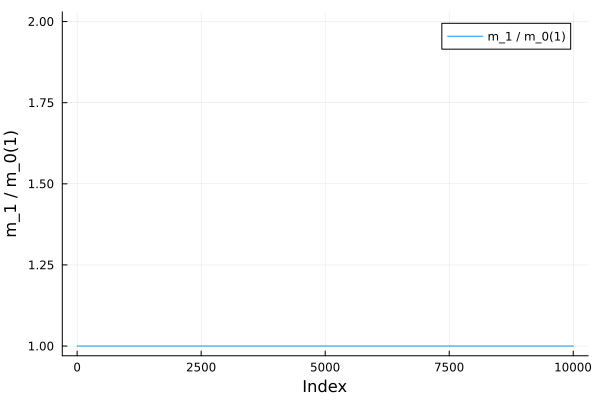

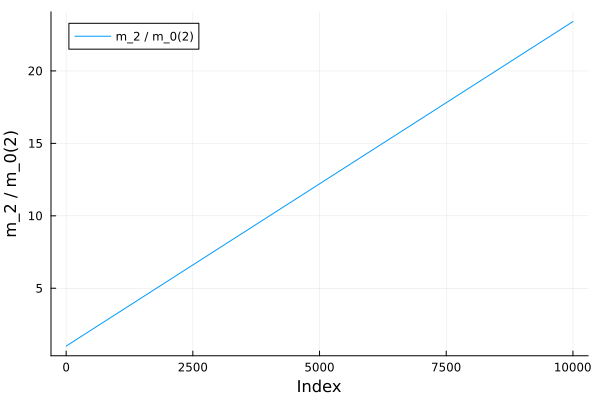

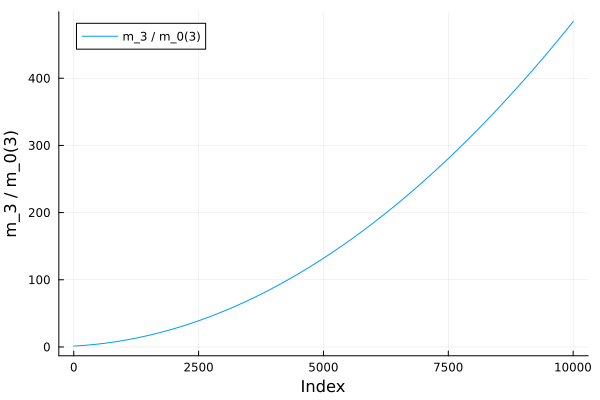

In [25]:
using CSV
using SpecialFunctions
using Plots

n0 = 1.0
v0 = 1.0
G = 1.0  # growth rate
beta = 1.0  # aggregation kernel
a = 1.0  # breakage kernel
D0 = 0.5  # internal dispersion coefficient
D2 = 0.5  # internal dispersion coefficient
N = 3  # Order of approximation / number of nodes

m_init = zeros(2 * N)
for i in 1:2 * N
    m_init[i] = n0 * v0^((i-1) / 3) * gamma(1 + (i-1) / 3)
end

# Analytical solutions for size independent growth (Marchisio paper 2004)
function size_indep_growth(t_values, m_init, G, n0)
    m0(t) = m_init[1] 
    m1(t) = m_init[2] + G * n0 * t
    m2(t) = m_init[3] + G^2 * n0 * t^2 + 2 * G * m_init[2] * t
    m3(t) = m_init[4] + G^3 * n0 * t^3 + 3 * G^2 * m_init[2] * t^2 + 3 * G * m_init[3] * t
    m4(t) = m_init[5] + G^4 * n0 * t^4 + 4 * G^3 * m_init[2] * t^3 + 6 * G^2 * m_init[3] * t^2 + 4 * G * m_init[4] * t
    m5(t) = m_init[6] + G^5 * n0 * t^5 + 5 * G^4 * m_init[2] * t^4 + 10 * G^3 * m_init[3] * t^3 + 10 * G^2 * m_init[4] * t^2 + 5 * G * m_init[5] * t
    moments = [m0, m1, m2, m3, m4, m5]
    results = [moment.(t_values) for moment in moments]

    return results
end

# Analytical solution for constant aggregation kernel (Marchisio paper 2004)
function const_aggreg(k, t)
    return m_init[k + 1] * (2.0 / (2.0 + n0 * beta * t))^(1.0 - k / 3.0)
end

# Analytical solutions for size dependent growth: 1\L (Marchisio paper 2004)
function size_dep_growth(t_values, m_init, G)
    m0(t) = m_init[1] 
    m2(t) = m_init[3] + 2 * G * m_init[1] * t
    m4(t) = m_init[5] + 4 * G * t * (G * m_init[1] * t + m_init[3])
    moments = [m0, m2, m4]
    results = [moment.(t_values) for moment in moments]
    return results
end

# Analytical solution for size-dependent, sum aggregation kernel
function size_dep_aggreg()
    m0 = [m_init[1], exp(-1), exp(-2), exp(-3), exp(-4), exp(-5), exp(-6), exp(-7), exp(-8), exp(-9), exp(-10)]
    m1 = [m_init[2], 0.401693, 0.173204, 0.0718396, 0.0288534, 0.0113048, 0.00434911, 0.00165141, 0.000621279, 0.00023221, 0.0000863954]
    m2 = [m_init[3], 0.566739, 0.341046, 0.197416, 0.110657, 0.0605076, 0.0324873, 0.017216, 0.00903918, 0.00471507, 0.00244821]
    m3 = [m_init[4], 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    m4 = [m_init[5], 2.13041, 3.97039, 7.57714, 14.6311, 28.399, 55.2397, 107.538, 209.416, 407.86, 793.469]
    m5 = [m_init[6], 5.284, 19.3915, 72.5958, 274.009, 1037.52, 3933.24, 14917.5, 56586.6, 214663, 814351]
    moments = [m0, m1, m2, m3, m4, m5]
    
    return moments
end

# Analytical solution for constant breakage kernel (Book and Marchisio paper 2002)
function const_breakage(k, t)
    return m_init[k + 1] * exp(a * (2^(1 - k) - 1) * t)
end

# Analytical solution for size-dependent internal dispersion
function size_dep_dispersion()
    m2_consts = [m_init[3] + D0 * m_init[1] / D2, -D0 * m_init[1] / D2]
    m3_consts = [m_init[4] + D0 * m_init[2] / D2, -D0 * m_init[2] / D2]
    m4_consts = [m_init[5] + D0 * (6 * m2_consts[1] + 5 * m2_consts[2]) / (5 * D2), -6 * D0 * m2_consts[1] / (5 * D2), -D0 * m2_consts[2] / D2]
    m5_consts = [m_init[6] + D0 * (10 * m3_consts[1] + 7 * m3_consts[2]) / (7 * D2), -10 * D0 * m3_consts[1] / (7 * D2), -D0 * m3_consts[2] / D2]
    m0(t) = m_init[1] * ones(length(t))
    m1(t) = m_init[2] * ones(length(t))
    m2(t) = m2_consts[1] * exp(2 * D2 * t) + m2_consts[2]
    m3(t) = m3_consts[1] * exp(6 * D2 * t) + m3_consts[2]
    m4(t) = m4_consts[1] * exp(12 * D2 * t) + m4_consts[2] * exp(2 * D2 * t) + m4_consts[3]
    m5(t) = m5_consts[1] * exp(20 * D2 * t) + m5_consts[2] * exp(6 * D2 * t) + m5_consts[3]
    moments = [m0, m1, m2, m3, m4, m5]
    return moments
end

t_values = 0:0.001:10.0
moments_list = size_indep_growth(t_values, m_init, G, n0)

moments_list_float64 = [float.(moment) for moment in moments_list]

# Write results to CSV
csv_filename = "size_independent_data_anajl.csv"
CSV.write(csv_filename, DataFrame(hcat(moments_list_float64...), :auto))
println("Data written to $csv_filename")

t_values = 0:0.001:10.0
moments_list = size_dep_growth(t_values, m_init, G)
moments_list_float64 = [float.(moment) for moment in moments_list]

# Write results to CSV
csv_filename = "size_dependent_data_anajl.csv"
CSV.write(csv_filename, DataFrame(hcat(moments_list...), :auto))

println("Data written to $csv_filename")

# Get the moments
t_values = 0:0.001:10.0
moments_list = size_dep_aggreg()
moments_list_float64 = [float.(moment) for moment in moments_list]

# Write results to CSV
csv_filename = "moments_data_size_dep_aggreg_anajl.csv"
CSV.write(csv_filename, DataFrame(hcat(moments_list...), :auto))
println("Data written to $csv_filename")

df = CSV.File("size_independent_data_anajl.csv") |> DataFrame

# Iterate over columns and plot
for i in 1:length(names(df))
    column_name = names(df)[i]
    constant = m_init[i]
    
    # Convert the y-axis data to a numerical type
    y_data = df[!, column_name] / constant
#     y_data = parse.(Float64, df[!, column_name]) / constant
    
    plot(1:size(df, 1), y_data, label="m_$i / m_0($i)")
    # Add labels and legend
    xlabel!("Index")
    ylabel!("m_$i / m_0($i)")
    

    # Show the plot
    display(Plots.plot!()) 
end
df = CSV.File("size_dependent_data_anajl.csv") |> DataFrame

# Iterate over columns and plot
for i in 1:length(names(df))
    column_name = names(df)[i]
    constant = m_init[i]
    
    # Convert the y-axis data to a numerical type
    y_data = df[!, column_name] / constant
#     y_data = parse.(Float64, df[!, column_name]) / constant
    
    plot(1:size(df, 1), y_data, label="m_$i / m_0($i)")
    # Add labels and legend
    xlabel!("Index")
    ylabel!("m_$i / m_0($i)")
 
    
    
    # Show the plot
    
    display(Plots.plot!()) 
end
